# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
data  = pd.read_csv('ab_data.csv')
print("info :", sep = '\n')
print(data.info(), sep = '\n')
print("dicribtion :",data.describe(), sep = '\n')
data.head(2)

info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None
dicribtion :
             user_id      converted
count  294478.000000  294478.000000
mean   787974.124733       0.119659
std     91210.823776       0.324563
min    630000.000000       0.000000
25%    709032.250000       0.000000
50%    787933.500000       0.000000
75%    866911.750000       0.000000
max    945999.000000       1.000000


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
len(data['user_id'])

294478

**c.** The number of unique users in the dataset.

In [4]:
pd.DataFrame(data['user_id'].unique()).count()

0    290584
dtype: int64

**d.** The proportion of users converted.

In [5]:
(data['converted']>0).sum()

35237

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
f = (data[data.landing_page == 'old_page'].group == 'treatment').sum()
s = (data[data.landing_page == 'new_page'].group == 'control').sum()
f+s

3893

**f.** Do any of the rows have missing values?

In [7]:
(data.isna().sum()).sum()

0

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
f

1965

In [9]:
q = (data[data.landing_page == 'new_page'].group == 'treatment').index
data.iloc[q]

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
10,929503,2017-01-18 05:37:11.527370,treatment,new_page,0
11,834487,2017-01-21 22:37:47.774891,treatment,new_page,0
12,803683,2017-01-09 06:05:16.222706,treatment,new_page,0
13,944475,2017-01-22 01:31:09.573836,treatment,new_page,0
14,718956,2017-01-22 11:45:11.327945,treatment,new_page,0


In [10]:
# Remove the inaccurate rows, and store the result in a new dataframe df2

#i = (data[data.landing_page == 'new_page'].group == 'treatment' == False).index
i = data[ ((data.landing_page == 'new_page') == (data.group == 'treatment')) == False].index

#i = (data[data.landing_page == 'old_page'].group == 'control').index
#s = data.iloc[i]
#df2 = pd.concat([f, s])
df2 = data.drop(i)

In [11]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

**a.** How many unique **user_id**s are in **df2**?

In [12]:
pd.DataFrame(df2['user_id'].unique()).count()[0]

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [13]:
dups = df2['user_id'].value_counts().index[0]
dups

773192

**c.** Display the rows for the duplicate **user_id**? 

In [14]:
df2[df2['user_id'] == dups]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [15]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2.drop(df2[df2.duplicated(subset = ["user_id"])].index)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'] == dups]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [16]:
df2.converted.mean()

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
b = df2[df2['group'] == "control"].converted.mean()
b

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
c = df2[df2['group'] == "treatment"].converted.mean()
c

0.11880806551510564

In [19]:
# calculate the actual difference (obs_diff)
# between the conversion rates for the two groups.
np.abs(b-c)

0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [20]:
(df2[df2['landing_page'] == 'new_page']).count()[0] \
/ len(df2)

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

***we can't tell, as the probability diffrence between them is too small 0.002 between 0.118 and 0.120*** 

***not enough evidince***

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  


If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.


$$H_0: p_{new} - p_{old} \leq 0$$

$$H_1: p_{new} - p_{old} > 0$$


### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [21]:
p_new =df2.converted.mean(); print(p_new)

0.119597087245


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [22]:
p_old =df2.converted.mean(); print(p_old)

0.119597087245


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [23]:
n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old = df2.query('group == "control"').count()[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**

In [25]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0, 1], size = n_new, p = (1-p_new, p_new))
np.sum(new_page_converted>0)

17315

**f. Simulate Sample for the `control` Group**


In [26]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0, 1], size = n_old, p = (1-p_old, p_old))
np.sum(old_page_converted>0)

17452

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [27]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.00097257406978970562

**h. Sampling distribution**

In [28]:
# Sampling distribution 
p_diffs = []
n = 10000
for i in range(n):
    #samples
    new_page_converted = np.random.choice([0, 1], size = n_new, p = (1-p_new, p_new))
    old_page_converted = np.random.choice([0, 1], size = n_old, p = (1-p_old, p_old))
    p_diffs.append(new_page_converted.mean()- old_page_converted.mean())

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>



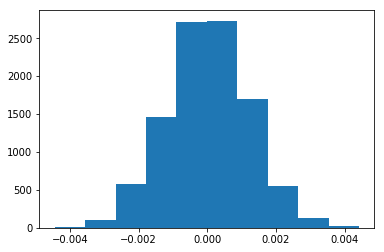

In [29]:
plt.hist(p_diffs);

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [30]:
actual = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
(np.array(p_diffs) > actual).sum()/len(p_diffs)

0.90720000000000001

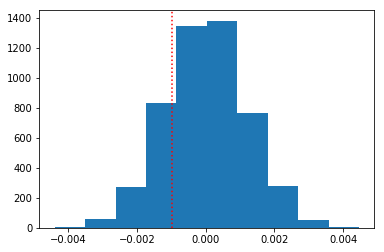

In [31]:
null_vals = np.random.normal(0, np.array(p_diffs).std(), 5000)
plt.hist(null_vals);
plt.axvline(label='actual', x=diff, linestyle=':', color='red');

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

***p_value = 0.905499***

***and alpha[type I error rate] = 0.05***

***as p_value > alpha***

***Failed to reject the null hypo.***



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 


In [32]:
import warnings 
# to ignore annoying python warnings
warnings.filterwarnings('ignore')

In [33]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query("group == 'control'").converted.sum()

# number of conversions with the new_page
convert_new = df2.query("group == 'treatment'").converted.sum()

# number of individuals who were shown the old_page
n_old =  df2.query("landing_page == 'old_page'").count()[0]

# number of individuals who received new_page
n_new = df2.query("landing_page == 'new_page'").count()[0]


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.

In [34]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="larger")
print(z_score, p_value)

1.31092419842 0.094941687241


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


***z-score = 1.31092419842***

***p-value = 0.905058312759***

***and alpha[type I error rate] = 0.05***

***as p_value > alpha***

***Failed to reject the null hypo.***

***yes, the results agree with the findings in j,and k.***

<a id='regression'></a>
### Part III - A regression approach


**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

***logisict reggrision***

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [35]:
#dummies = pd.get_dummies(df2.group, drop_first=True)
df2['intercept'] = 1
df2['ab_page'] = (df2.group == 'treatment').astype(int)

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [36]:
logit_model = sm.Logit(df2["converted"], df2[['intercept', 'ab_page']])

logit_model_fitted = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
logit_model_fitted.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-21 16:16 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


***p_value = 0.1899***

***we both took diffreant aproaches to calculate it***
***first we calculateed the conditional propabilty of the given data that the null is ture. But,the ab_page one the null for it is that there is no strong relationsip between the conversion rate and ab_page. Therefore p_value is low
Therefor, the conversion is not dependent on the page.***

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

***we could add features like timestapms, or age. It could give us more accurat results or just be irrelevent and increase the problem dimensionality and the model complexity ofcourse***

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 


In [38]:
# Read the countries.csv
countries_df = pd.read_csv('countries.csv')
countries_df.head(2)

,user_id,country
0,834778,UK
1,928468,US


In [39]:
# Join with the df2 dataframe
df = df2.merge(countries_df, on="user_id", how = "left")
df.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US


In [40]:
# Create the necessary dummy variables
dummy_countries = pd.get_dummies(df['country'])
dummy_countries = dummy_countries[['US','CA']]
dummy_countries.head(2)

,US,CA
0,1,0
1,1,0


In [41]:
df = df.join(dummy_countries)
df.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,1,0


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [42]:
logit_model = sm.Logit(df["converted"], df[['intercept', 'ab_page', 'US', 'CA']])

logit_model_fitted = logit_model.fit()

logit_model_fitted.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-21 16:16 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
==================================================================

"""

In [43]:
1/np.exp(logit_model_fitted.params[1:])

ab_page    1.015056
US         1.009932
CA         1.051944
dtype: float64

***A conversion is 1.015 times less likely, if a user receives the treatment page,holding all other variables constant***

***A conversion is 1.00994 times less likely, if the user lives in US and not the CA.***

***A conversion is 1.0519 times less likely, if the user lives in CA and not the US***

In [44]:
df["CA_page"] = df["CA"] * df["ab_page"]
df["US_page"] = df["US"] * df["ab_page"]
df.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,CA_page,US_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,1,0,0,0


In [45]:
logit_model = sm.Logit(df["converted"], df[["intercept", "ab_page", "CA", "US", "CA_page", "US_page"]])
logit_model_fitted = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [46]:
logit_model_fitted.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-21 16:16 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9922    0.0161  -123.4571  0.0000  -2.0238  -1.9606
ab_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
CA           -0.0118    0.0398    -0.2957  0.7674  -0.0899   0.0663
US            0.0057    0.0188     0.3057  0.7598  -0.0311   0.0426
CA_page      -0.0783    0.0568    -1.3783  0.1681  -0.1896   0.0330
US_page      -0.0314    0.0266    -1.1807  0.2377  -0.0835   0.0207
==================================================================

"""

In [47]:
1/np.exp(logit_model_fitted.params[1:])

ab_page    0.989224
CA         1.011854
US         0.994272
CA_page    1.081428
US_page    1.031896
dtype: float64

***the same here did't provide any strong effect on conversion***

***so don;t add more unrelated terms to the model. it dosen't help here***

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0